In [57]:
from numpy import array
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from fbprophet import Prophet

In [98]:
# Pickling Call Volume 2018 df
redo_pickle = False

if redo_pickle == True:
    with open('hourly_call_volume_medical_2018.pickle','wb') as f:
        pickle.dump(hourly_call_volume_medical_2018,f)
        
if redo_pickle == False:
    with open('hourly_call_volume_medical_2018.pickle','rb') as f:
        hourly_call_volume_medical_2018 = pickle.load(f)

In [119]:
hourly_call_volume_medical_2018 = pd.DataFrame(hourly_call_volume_medical_2018[:722])

In [120]:
hourly_call_volume_medical_2018 = hourly_call_volume_medical_2018.reset_index()

In [121]:
hourly_call_volume_medical_2018 = hourly_call_volume_medical_2018.rename(columns={'Hourly_DtTm':'ds','Call Number':'y'})

In [122]:
# Creating 80-20 train-test split
size = int(len(hourly_call_volume_medical_2018) * 0.8)
train, test = hourly_call_volume_medical_2018[0:size], hourly_call_volume_medical_2018[size:]

In [123]:
m = Prophet(daily_seasonality=True, weekly_seasonality=True, )
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/anaconda3/envs/py36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [124]:
future = m.make_future_dataframe(periods=14)
future.tail()

,ds
586,2018-02-04
587,2018-02-05
588,2018-02-06
589,2018-02-07
590,2018-02-08


In [125]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
586,2018-02-04,8.417563,3.704890,13.434799
587,2018-02-05,8.887875,4.325829,14.172989
588,2018-02-06,8.440861,3.558011,13.409749
589,2018-02-07,7.809393,2.693413,12.521446
590,2018-02-08,7.864866,2.838686,12.729542


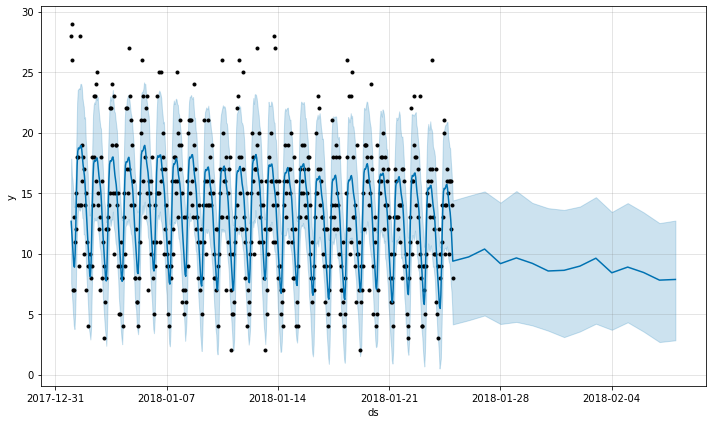

In [126]:
fig1 = m.plot(forecast)

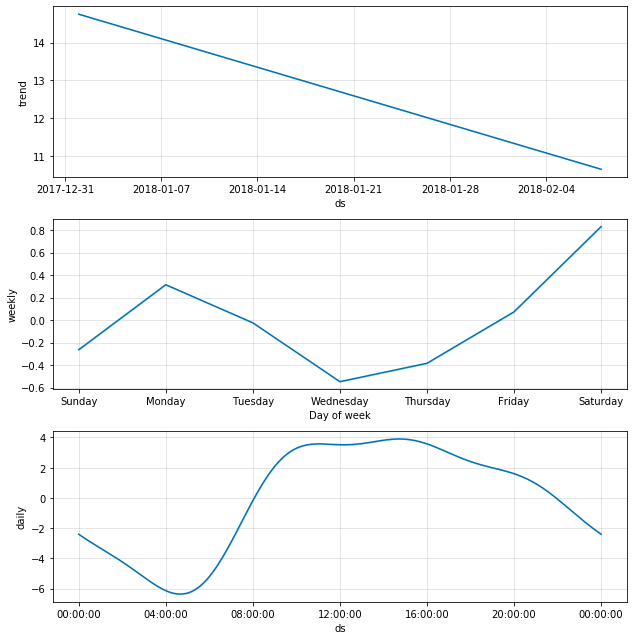

In [127]:
fig2 = m.plot_components(forecast)

In [115]:
hourly_call_volume_medical_2018['dow'] = hourly_call_volume_medical_2018.ds.dt.dayofweek

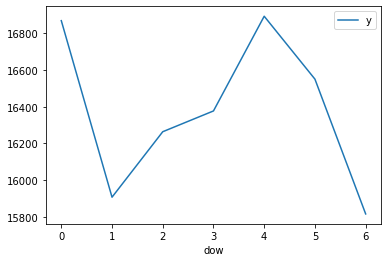

In [116]:
sns.lineplot(data=hourly_call_volume_medical_2018.groupby('dow').sum())

In [118]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01 00:00:00,13.800181,6.278821,15.703227,13.800181,13.800181,-2.695105,-2.695105,-2.695105,-2.525242,-2.525242,-2.525242,-0.169862,-0.169862,-0.169862,0.0,0.0,0.0,11.105077
1,2018-01-01 01:00:00,13.799412,5.222884,14.663540,13.799412,13.799412,-3.728061,-3.728061,-3.728061,-3.583262,-3.583262,-3.583262,-0.144798,-0.144798,-0.144798,0.0,0.0,0.0,10.071352
2,2018-01-01 02:00:00,13.798643,4.259495,13.755367,13.798643,13.798643,-4.808404,-4.808404,-4.808404,-4.688193,-4.688193,-4.688193,-0.120212,-0.120212,-0.120212,0.0,0.0,0.0,8.990239
3,2018-01-01 03:00:00,13.797874,2.854561,12.678633,13.797874,13.797874,-5.952311,-5.952311,-5.952311,-5.855892,-5.855892,-5.855892,-0.096418,-0.096418,-0.096418,0.0,0.0,0.0,7.845564
4,2018-01-01 04:00:00,13.797105,1.951933,11.565668,13.797105,13.797105,-6.834529,-6.834529,-6.834529,-6.760809,-6.760809,-6.760809,-0.073720,-0.073720,-0.073720,0.0,0.0,0.0,6.962576
5,2018-01-01 05:00:00,13.796336,2.268384,12.174084,13.796336,13.796336,-6.873096,-6.873096,-6.873096,-6.820696,-6.820696,-6.820696,-0.052400,-0.052400,-0.052400,0.0,0.0,0.0,6.923240
6,2018-01-01 06:00:00,13.795567,3.186510,12.607409,13.795567,13.795567,-5.640425,-5.640425,-5.640425,-5.607707,-5.607707,-5.607707,-0.032718,-0.032718,-0.032718,0.0,0.0,0.0,8.155142
7,2018-01-01 07:00:00,13.794798,5.647154,15.157141,13.794798,13.794798,-3.270102,-3.270102,-3.270102,-3.255191,-3.255191,-3.255191,-0.014911,-0.014911,-0.014911,0.0,0.0,0.0,10.524697
8,2018-01-01 08:00:00,13.794030,8.386183,18.260959,13.794030,13.794030,-0.479919,-0.479919,-0.479919,-0.480732,-0.480732,-0.480732,0.000813,0.000813,0.000813,0.0,0.0,0.0,13.314110
9,2018-01-01 09:00:00,13.793261,11.055301,20.226148,13.793261,13.793261,1.854349,1.854349,1.854349,1.840076,1.840076,1.840076,0.014273,0.014273,0.014273,0.0,0.0,0.0,15.647610


In [128]:
12.3**(1/2)

3.5071355833500366